In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#create the dataframe by reading 'handwriting_training_set.csv' file
training_set = pd.read_csv('handwriting_training_set.csv', header=None)
test_set = pd.read_csv('handwriting_test_set.csv', header=None)

In [3]:
#split 10 digit from training set
digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9 = np.array_split(training_set,10)

In [4]:
#put 10 digit class matrix into a list
digit_list = []
digit_list.append(digit_0)
digit_list.append(digit_1)
digit_list.append(digit_2)
digit_list.append(digit_3)
digit_list.append(digit_4)
digit_list.append(digit_5)
digit_list.append(digit_6)
digit_list.append(digit_7)
digit_list.append(digit_8)
digit_list.append(digit_9)

In [5]:
#this function is used to calculate svd of each digit class, and return matrix U and matrix sigma of each digit class
def calculateSVD(digitMatrix):
    digitMatrix_T = digitMatrix.T
    ui,si,vhi = np.linalg.svd(digitMatrix_T, full_matrices=True)
    return ui,si

In [6]:
#put all matrix U of 10 digit class into a list u_list
#put all matrix si of 10 digit class into a list si_list
u_list = []
si_list = []
for di in digit_list:
    ui,si = calculateSVD(di)
    u_list.append(ui)
    si_list.append(si)

In [7]:
# square() squares each element in list
def square(list):
    return [i ** 2 for i in list]

In [8]:
#index_of_minimum() is used to find the position of the minimum element is a list
def index_of_minimum(list):
    return list.index(min(list))

# Classify Digit

In [9]:
rank = [5,10,15,20] #this list contains 4 rank vlues
predict_list_r = [] #this list contains predicted result based on each r

#classify_digit() classifies digits in test set and return prediction list based on diffrent r value
def classify_digit():
    for r in rank: #traverse each r in rank list
        u_list_r = [] #u_list_r contains matrix ui_r 
        predict_list = [] #store 1000 prediction result based on current r
        
        for ui in u_list:
            ui_r = ui[:,:r] #matrix ui_r only takes r columns from matrix ui
            u_list_r.append(ui_r)
            
        
        for j in range(len(test_set)): #pick each sample in test set, and do classification
            residual = [] #residual contains all 10 residuals after y is projected onto 10 ui matrices
            y = test_set.iloc[j,:] #y is a single sample that needs to be classified
            
            for i in range(len(u_list_r)): #pick each ui_r from u_list_r
                ui_r_temp = u_list_r[i]
                y_hat_i = np.matmul( ui_r_temp, np.matmul(ui_r_temp.T, y) ) #project y onto each ui_r get y_hat_i
                residual_i = np.sqrt(sum( square(y-y_hat_i) )) #find the norm of y-y_hat_i
                residual.append(residual_i) #append 10 residual_i to residual list
                
            predicted_digit = index_of_minimum(residual) #the index of the minimum element is the list the predicted result for sample y
            predict_list.append(predicted_digit) #append the prediction to predict_list based on current r
            
        predict_list_r.append(predict_list)  #put predict result list from 4 different r into a list
        

    return predict_list_r            
    

# Part A.i

In [10]:
#load ground truth result 
test_set_labels = pd.read_csv('handwriting_test_set_labels.csv', header=None)

In [11]:
predict_list_r = classify_digit()

In [12]:
#compare predicted labels and actual labels list
for j in range(len(predict_list_r)):
    r = rank[j]
    predict_list = predict_list_r[j]
    false = 0
    true = 0

    for i in range(len(predict_list)):
        label = test_set_labels.iloc[i,:].values
        predict = predict_list[i]
        if (label==10) & (predict==0):
            true = true + 1
        elif label == predict:
            true = true + 1
        else:
            false = false + 1
    
    accuracy = true / len(predict_list)
    print('When r = ', r, '  accuracy = ', accuracy)

When r =  5   accuracy =  0.918
When r =  10   accuracy =  0.944
When r =  15   accuracy =  0.953
When r =  20   accuracy =  0.957


# Part A.ii

In [19]:
test_set_labels_list = test_set_labels.values.tolist() #convert dataframe to list

In [20]:
count = [0] * 10 # this list contains count of each digit class in test_set_label
for label_list in (test_set_labels_list):
    label = label_list[0]
    if  label==10: count[0] = count[0]+1
    elif label==1: count[1] = count[1]+1 
    elif label==2: count[2] = count[2]+1
    elif label==3: count[3] = count[3]+1
    elif label==4: count[4] = count[4]+1
    elif label==5: count[5] = count[5]+1
    elif label==6: count[6] = count[6]+1
    elif label==7: count[7] = count[7]+1
    elif label==8: count[8] = count[8]+1
    else : count[9] = count[9]+1

In [21]:
predict_list_20 = predict_list_r[3]
true = [0] * 10 #this list contains true count for digit 0...9

#find correct prediction count for each digit class based on the highest accuracy when r=20
for i in range(len(predict_list_20)): 
    label = test_set_labels.iloc[i,:].values
    predict = predict_list_20[i]
    
    if (label==10) & (predict==0):
        true[0] = true[0] + 1
    elif (label==1) & (predict==1):
        true[1] = true[1] + 1
    elif (label==2) & (predict==2):
        true[2] = true[2] + 1
    elif (label==3) & (predict==3):
        true[3] = true[3] + 1
    elif (label==4) & (predict==4):
        true[4] = true[4] + 1
    elif (label==5) & (predict==5):
        true[5] = true[5] + 1
    elif (label==6) & (predict==6):
        true[6] = true[6] + 1
    elif (label==7) & (predict==7):
        true[7] = true[7] + 1
    elif (label==8) & (predict==8):
        true[8] = true[8] + 1
    elif (label==9) & (predict==9):
        true[9] = true[9] + 1

In [23]:
print('When number of basis = 20: (gives best general accuracy)')
for i in range(len(true)): #find accuracy for each digit class
    accuracy = true[i] / count[i]
    print('when digit = ', i, '   accuracy = ', accuracy)

When number of basis = 20: (gives best general accuracy)
when digit =  0    accuracy =  1.0
when digit =  1    accuracy =  0.99
when digit =  2    accuracy =  0.89
when digit =  3    accuracy =  0.93
when digit =  4    accuracy =  0.96
when digit =  5    accuracy =  0.96
when digit =  6    accuracy =  1.0
when digit =  7    accuracy =  0.97
when digit =  8    accuracy =  0.89
when digit =  9    accuracy =  0.98


## digit 8 and digit 2 are the two classes which are most difficult to be classified

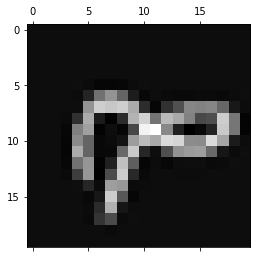

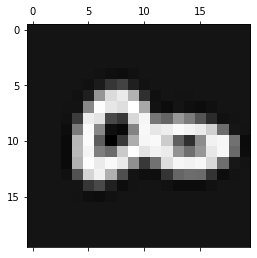

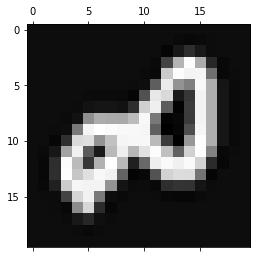

In [17]:
#print out three image samples from digit 8 class
test1_d8 = test_set.iloc[1,:].to_numpy()
test1_d8 = test1_d8.reshape((20,20))
plt.matshow(test1_d8,cmap='gray')
test2_d8 = test_set.iloc[3,:].to_numpy()
test2_d8 = test2_d8.reshape((20,20))
plt.matshow(test2_d8,cmap='gray')
test3_d8 = test_set.iloc[999,:].to_numpy()
test3_d8 = test3_d8.reshape((20,20))
plt.matshow(test3_d8,cmap='gray')

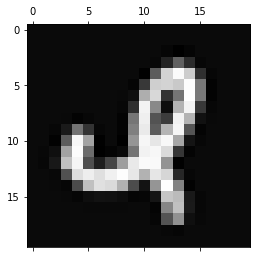

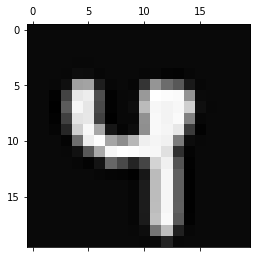

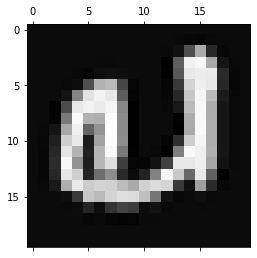

In [18]:
#print out three image samples from digit 2 class
test1_d2 = test_set.iloc[28,:].to_numpy()
test1_d2 = test1_d2.reshape((20,20))
plt.matshow(test1_d2,cmap='gray')
test2_d2 = test_set.iloc[18,:].to_numpy()
test2_d2 = test2_d2.reshape((20,20))
plt.matshow(test2_d2,cmap='gray')
test3_d2 = test_set.iloc[976,:].to_numpy()
test3_d2 = test3_d2.reshape((20,20))
plt.matshow(test3_d2,cmap='gray')

# Part A . iii

In [31]:
for j in range (4):
    rank = [5,10,15,20]
    true = [0] * 10 #this list contains true count for digit 0...9
    predict_list_j = predict_list_r[j]
    
    for i in range(len(predict_list_j)): 
        label = test_set_labels.iloc[i,:].values
        predict = predict_list_j[i]
    
        if (label==10) & (predict==0):
            true[0] = true[0] + 1
        elif (label==1) & (predict==1):
            true[1] = true[1] + 1
        elif (label==2) & (predict==2):
            true[2] = true[2] + 1
        elif (label==3) & (predict==3):
            true[3] = true[3] + 1
        elif (label==4) & (predict==4):
            true[4] = true[4] + 1
        elif (label==5) & (predict==5):
            true[5] = true[5] + 1
        elif (label==6) & (predict==6):
            true[6] = true[6] + 1
        elif (label==7) & (predict==7):
            true[7] = true[7] + 1
        elif (label==8) & (predict==8):
            true[8] = true[8] + 1
        elif (label==9) & (predict==9):
            true[9] = true[9] + 1
    
    print('When number of basis = ', rank[j])
    for i in range(len(true)): #find accuracy for each digit class
        accuracy = true[i] / count[i]
        print('when digit = ', i, '   accuracy = ', accuracy)
    

When number of basis =  5
when digit =  0    accuracy =  0.99
when digit =  1    accuracy =  0.98
when digit =  2    accuracy =  0.87
when digit =  3    accuracy =  0.89
when digit =  4    accuracy =  0.9
when digit =  5    accuracy =  0.86
when digit =  6    accuracy =  0.98
when digit =  7    accuracy =  0.93
when digit =  8    accuracy =  0.88
when digit =  9    accuracy =  0.9
When number of basis =  10
when digit =  0    accuracy =  1.0
when digit =  1    accuracy =  0.99
when digit =  2    accuracy =  0.88
when digit =  3    accuracy =  0.93
when digit =  4    accuracy =  0.94
when digit =  5    accuracy =  0.94
when digit =  6    accuracy =  0.98
when digit =  7    accuracy =  0.94
when digit =  8    accuracy =  0.89
when digit =  9    accuracy =  0.95
When number of basis =  15
when digit =  0    accuracy =  1.0
when digit =  1    accuracy =  0.99
when digit =  2    accuracy =  0.89
when digit =  3    accuracy =  0.94
when digit =  4    accuracy =  0.97
when digit =  5    accur

# Part B

In [32]:
#this function process matrix ui_1 by only taking one column from ui
def get_ui_1():
    u_list_1 = [] #u_list_1 contains matrix ui_1 
    for ui in u_list:
        ui_1 = ui[:,:1] #matrix ui_1 only takes 1 column from matrix ui
        u_list_1.append(ui_1)
    return u_list_1

In [33]:
#this function return the max difference between elements in a list
def getMaxDif(list):
    min_v = list[0]
    max_d = 0
    for i in range(len(list)):
        if (list[i] < min_v):
            vmin = list[i]
        elif (list[i] - min_v > max_d):
            max_d = list[i] - min_v
    return max_d

In [34]:
rank = [5,10,15,20] #this list contains 4 rank vlues
predict_list_r_twostage = [] #this list contains predicted result based on each r

#classify_digit_twostage() classifies digits in test set and return prediction list based on diffrent r value
def classify_digit_twostage():
    u_list_1 = get_ui_1()
    predict_list_1 = [] ##store 1000 prediction result based on r=1
    
    for r in rank: #traverse each r in rank list
        u_list_r = [] #u_list_r contains matrix ui_r 
        predict_list = [] #store 1000 prediction result based on current r
        
        for ui in u_list:
            ui_r = ui[:,:r] #matrix ui_r only takes r columns from matrix ui
            u_list_r.append(ui_r)
            
        
        for j in range(len(test_set)): #pick each sample in test set, and do classification
            residual = [] #residual contains all 10 residuals after y is projected onto 10 ui matrices when r=5,10,15,20
            residual_1 = [] #residual_1 contains all 10 residuals after y is projected onto 10 ui matrices when r=1
            y = test_set.iloc[j,:] #y is a single sample that needs to be classified
            
            for k in range(len(u_list_1)):
                ui_1_temp = u_list_1[k]
                y_hat_i = np.matmul( ui_1_temp, np.matmul(ui_1_temp.T, y) ) #project y onto each ui_1 get y_hat_i
                residual_1_i = np.sqrt(sum( square(y-y_hat_i) )) #find the norm of y-y_hat_i
                residual_1.append(residual_1_i) #append 10 residual_i to residual_1 list
            maxD = getMaxDif(residual_1) #find the max difference between residuals for each sample y
            
            if maxD >= 1 :  #if one residual is significantly larger that the other (difference>=1),predict the digit using only one singular vector
                predicted_digit = index_of_minimum(residual_1)
                predict_list.append(predicted_digit)
            else: #else predict digit like part A
                for i in range(len(u_list_r)): #pick each ui_r from u_list_r
                    ui_r_temp = u_list_r[i]
                    y_hat_i = np.matmul( ui_r_temp, np.matmul(ui_r_temp.T, y) ) #project y onto each ui_r get y_hat_i
                    residual_i = np.sqrt(sum( square(y-y_hat_i) )) #find the norm of y-y_hat_i
                    residual.append(residual_i) #append 10 residual_i to residual list
                
                predicted_digit = index_of_minimum(residual) #the index of the minimum element is the list the predicted result for sample y
                predict_list.append(predicted_digit) #append the prediction to predict_list based on current r
            
        predict_list_r_twostage.append(predict_list)  #put predict result list from 4 different r into a list
        

    return predict_list_r_twostage           
    

In [35]:
predict_list_r_twostage = classify_digit_twostage()

In [36]:
#compare predicted labels and actual labels list
for j in range(len(predict_list_r_twostage)):
    r = rank[j]
    predict_list = predict_list_r_twostage[j]
    false = 0
    true = 0

    for i in range(len(predict_list)):
        label = test_set_labels.iloc[i,:].values
        predict = predict_list[i]
        if (label==10) & (predict==0):
            true = true + 1
        elif label == predict:
            true = true + 1
        else:
            false = false + 1
    
    accuracy = true / len(predict_list)
    print('When r = ', r, '  accuracy = ', accuracy)

When r =  5   accuracy =  0.896
When r =  10   accuracy =  0.918
When r =  15   accuracy =  0.927
When r =  20   accuracy =  0.934
